## Advanced Machine Learning - Pairs Trading Model
## ESSEC & CentraleSupélec

<div class="alert alert-block alert-info">
<b>By : FOUKI HOUSSAM - LARAQUI GHALI

<p>0. Import all important libraries</p>
<p>In this section, the necessary libraries are imported. These include:</p>
<ul>
  <li><code>yahoofinancials</code>: This library is used to retrieve stock data from Yahoo Finance. It allows you to request historical price data for a given set of stocks over a specified time period.</li>
  <li><code>pandas</code>: This library is used for data manipulation and visualization. It provides functions for reading and writing data, handling missing values, and performing statistical analysis.</li>
  <li><code>seaborn</code> and <code>matplotlib</code>: These libraries are used for data visualization. They provide functions for creating plots and charts, and allow you to customize the appearance of the plots.</li>
  <li><code>numpy</code>: This library is used for numerical operations. It provides functions for performing mathematical operations on arrays, matrices, and other numerical data structures.</li>
  <li><code>statsmodels</code>: This library is used for statistical analysis. It provides functions for fitting statistical models to data, performing hypothesis tests, and calculating summary statistics.</li>
  <li><code>sklearn</code>: This library is used for machine learning. It provides functions for training and evaluating machine learning models, as well as functions for preprocessing data and evaluating model performance.</li>
</ul>
<p>1. Setup</p>
<p>In this section, the code defines a list of stocks to analyze. This list is simply an array of strings containing the ticker symbols for the stocks.</p>
<p>2. Load dataset & Data preparation</p>
<p>In this section, the code either retrieves the stock data from Yahoo Finance using the <code>yahoofinancials</code> library or loads the data from a CSV file if it is available. If the data is being retrieved from Yahoo Finance, the <code>yahoofinancials</code> library is used to request The data is then stored in a <code>Pandas</code> DataFrame and cleaned for further processing. The date column is converted to a <code>datetime</code> data type and set as the index of the DataFrame. The data is then saved to a CSV file for future use.</p>
<p>3. Statistical Analysis</p>
<p>In this section, the code performs a statistical analysis on the data to identify cointegrated pairs. It does this by using the <code>coint</code> function from the <code>statsmodels</code> library to calculate a t-statistic and p-value for each pair of stocks. The <code>coint</code> function tests the hypothesis that two time series are cointegrated, and returns a t-statistic and p-value that can be used to evaluate the hypothesis. If the p-value is below a certain threshold (e.g. 0.05), then the hypothesis can be rejected and the two time series can be considered cointegrated.</p>
<p>4. Machine Learning</p>
<p>In this section, the code trains and evaluates several machine learning models to predict the spread between the pairs of stocks. The models include linear regression, random forest regression, and a multi-layer perceptron. The code uses the <code>sklearn</code> library to train and evaluate the models.</p>

<p>To train the models, the code first splits the data into training and test sets using the <code>train_test_split</code> function from <code>sklearn</code>. The training set is used to fit the models, and the test set is used to evaluate the performance of the models. The code then uses the <code>LinearRegression</code>, <code>RandomForestRegressor</code>, and <code>MLPRegressor</code> classes from <code>sklearn</code> to train the respective models.</p>
<p>To evaluate the models, the code calculates the mean squared error (<code>MSE</code>) between the predicted and actual values for the spread. The <code>MSE</code> is a measure of the difference between the predicted and actual values, and is a commonly used metric for evaluating the performance of regression models. A lower <code>MSE</code> indicates a better fit.</p>
<p>5. Results</p>
<p>In this final section, the code visualizes the results of the machine learning models and compares their performance. It does this by plotting the predicted and actual values for the spread, and by calculating the <code>MSE</code> for each model. The code also discusses the implications of the results and offers some suggestions for further work.</p>
<p>Overall, this code provides a framework for performing a pairs trading strategy based on cointegration applied to S&P 500 data using Python. It demonstrates how to retrieve and clean financial data, test for cointegration, and apply machine learning techniques to predict the spread between pairs of stocks. By following the steps outlined in this code, you can build your own pairs trading system and potentially realize returns from the S&P 500 market.</p>

In [ ]:
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 58.3 MB/s eta 0:00:00
  Created wheel for yahoofinancials: filename=yahoofinancials-1.8-py3-none-any.whl size=16277 sha256=344a2530d91886ec9486f6f9dbb1b3ebcbac40718eec67ac48eefeaf7af557e4
  Stored in directory: /root/.cache/pip/wheels/d9/ac/d6/ec466f80762eb0b17856558b13bc247e46888ba432d2b310f5
Successfully built yahoofinancials
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# Import all important libraries

In [ ]:
# Import yahoofinancials library for retrieving stock data
import yahoofinancials
# Import libraries for data manipulation and visualization
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
# Import statsmodels library for statistical analysis
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
# Import libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

In [ ]:
stock_list=[ 'AMD', 'GOOGL', 'GOOG', 'MO', 'AMZN',
             'APA', 'AAPL', 'AMAT', 'APTV', 'ADM','BKR',
             'WHR','WMB','WYNN','XEL','XYL','YUM']

#  Load dataset & Data preparation

* If the first time runing or u don't have the data :

    **We will use Yahoo Api to get financials data**
        * S&P 500

If not Jump to [Load the data from CSV File]

##   Using YahooFinancials

In [ ]:
from yahoofinancials import YahooFinancials

yahoo_financials = yahoofinancials.YahooFinancials(stock_list)
stock_data = yahoo_financials.get_historical_price_data(start_date='2010-01-01', end_date='2023-01-01', time_interval='daily')


In [ ]:
df = pd.DataFrame()
for s in stock_list:
    if "prices"  in stock_data[s].keys():
        df[s] = pd.DataFrame(stock_data[s]['prices'])[['formatted_date', 'close']].set_index('formatted_date')['close']


In [ ]:
df.head()

,AMD,GOOGL,GOOG,MO,AMZN,APA,AAPL,AMAT,APTV,ADM,BKR,WHR,WMB,WYNN,XEL,XYL,YUM
formatted_date,,,,,,,,,,,,,,,,,
2010-01-04,9.70,15.684434,15.610239,19.790001,6.6950,105.870003,7.643214,14.30,NaN,31.469999,41.240002,81.949997,17.616472,63.959999,21.080000,NaN,25.226456
2010-01-05,9.71,15.615365,15.541497,19.799999,6.7345,107.120003,7.656429,14.19,NaN,31.639999,43.660000,81.779999,17.836576,67.849998,20.830000,NaN,25.140186
2010-01-06,9.57,15.221722,15.149715,20.090000,6.6125,108.800003,7.534643,14.16,NaN,31.559999,45.840000,81.059998,18.415367,66.959999,20.870001,NaN,24.960461
2010-01-07,9.47,14.867367,14.797037,20.059999,6.5000,107.150002,7.520714,14.01,NaN,31.230000,46.169998,82.800003,18.284937,68.389999,20.780001,NaN,24.953272
2010-01-08,9.43,15.065566,14.994298,20.110001,6.6760,106.589996,7.570714,14.55,NaN,30.840000,47.099998,84.559998,18.431671,67.900002,20.790001,NaN,24.960461


In [ ]:
used_stock_list = list(df.columns.values)
df.reset_index(inplace=True)

In [ ]:
df.head()

,formatted_date,AMD,GOOGL,GOOG,MO,AMZN,APA,AAPL,AMAT,APTV,ADM,BKR,WHR,WMB,WYNN,XEL,XYL,YUM
0,2010-01-04,9.70,15.684434,15.610239,19.790001,6.6950,105.870003,7.643214,14.30,NaN,31.469999,41.240002,81.949997,17.616472,63.959999,21.080000,NaN,25.226456
1,2010-01-05,9.71,15.615365,15.541497,19.799999,6.7345,107.120003,7.656429,14.19,NaN,31.639999,43.660000,81.779999,17.836576,67.849998,20.830000,NaN,25.140186
2,2010-01-06,9.57,15.221722,15.149715,20.090000,6.6125,108.800003,7.534643,14.16,NaN,31.559999,45.840000,81.059998,18.415367,66.959999,20.870001,NaN,24.960461
3,2010-01-07,9.47,14.867367,14.797037,20.059999,6.5000,107.150002,7.520714,14.01,NaN,31.230000,46.169998,82.800003,18.284937,68.389999,20.780001,NaN,24.953272
4,2010-01-08,9.43,15.065566,14.994298,20.110001,6.6760,106.589996,7.570714,14.55,NaN,30.840000,47.099998,84.559998,18.431671,67.900002,20.790001,NaN,24.960461


####  Convert the formatted_date to datetime & set it as index

In [ ]:
# Convert the date column to datetime and set it as the index
df['formatted_date'] = pd.to_datetime(df['formatted_date'])
df.set_index('formatted_date', inplace=True)

#### Save the data as csv fille

In [ ]:
df.to_csv("s&p500_data.csv")

##   Load the data from CSV File (Run if you have the btc csv file)

In [ ]:
df = pd.read_csv("s&p500_data.csv")
df['formatted_date'] = pd.to_datetime(df['formatted_date'])
df.set_index('formatted_date', inplace=True)

#  preprocessing

**Check if there is any NaN values**

In [ ]:
print("Is there any NaN values -------->", df.isna().any().any())

Is there any NaN values --------> True


**Fill NA/NaN values by propagating last valid observation forward to next valid & verse versa**

In [ ]:
df = df.fillna(method="ffill")
df = df.fillna(method="bfill")
df.head()

,AMD,GOOGL,GOOG,MO,AMZN,APA,AAPL,AMAT,APTV,ADM,BKR,WHR,WMB,WYNN,XEL,XYL,YUM
formatted_date,,,,,,,,,,,,,,,,,
2010-01-04,9.70,15.684434,15.610239,19.790001,6.6950,105.870003,7.643214,14.30,17.879295,31.469999,41.240002,81.949997,17.616472,63.959999,21.080000,24.25,25.226456
2010-01-05,9.71,15.615365,15.541497,19.799999,6.7345,107.120003,7.656429,14.19,17.879295,31.639999,43.660000,81.779999,17.836576,67.849998,20.830000,24.25,25.140186
2010-01-06,9.57,15.221722,15.149715,20.090000,6.6125,108.800003,7.534643,14.16,17.879295,31.559999,45.840000,81.059998,18.415367,66.959999,20.870001,24.25,24.960461
2010-01-07,9.47,14.867367,14.797037,20.059999,6.5000,107.150002,7.520714,14.01,17.879295,31.230000,46.169998,82.800003,18.284937,68.389999,20.780001,24.25,24.953272
2010-01-08,9.43,15.065566,14.994298,20.110001,6.6760,106.589996,7.570714,14.55,17.879295,30.840000,47.099998,84.559998,18.431671,67.900002,20.790001,24.25,24.960461


In [ ]:
print("Is there any NaN values -------->", df.isna().any().any())

Is there any NaN values --------> False


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMD,3272.0,27.089352,35.297289,1.620000,4.010000,8.690000,32.887499,161.910004
GOOGL,3272.0,49.160898,35.804094,10.912663,20.295858,38.563002,61.738001,149.838501
GOOG,3272.0,48.989126,36.174894,10.861040,20.199849,37.592999,61.511748,150.709000
MO,3272.0,45.497479,14.150316,19.370001,34.817500,45.560001,55.630001,77.709999
AMZN,3272.0,58.912957,54.078546,5.430500,13.327125,36.393749,93.131001,186.570496
APA,3272.0,59.122992,31.383639,4.020000,34.592501,50.950001,86.145000,133.369995
AAPL,3272.0,51.321186,47.357062,6.858929,18.967589,29.815000,56.777499,182.009995
AMAT,3272.0,42.914138,37.802611,9.850000,15.100000,25.280000,55.202500,167.000000
APTV,3272.0,67.225285,37.952889,16.454317,36.259429,63.738476,87.419998,178.119995
ADM,3272.0,44.327081,14.901381,24.160000,33.820002,42.430000,47.900002,98.220001


#  Visualise the data & Analysis

Text(0.5, 1.0, 'the used  stocks ')

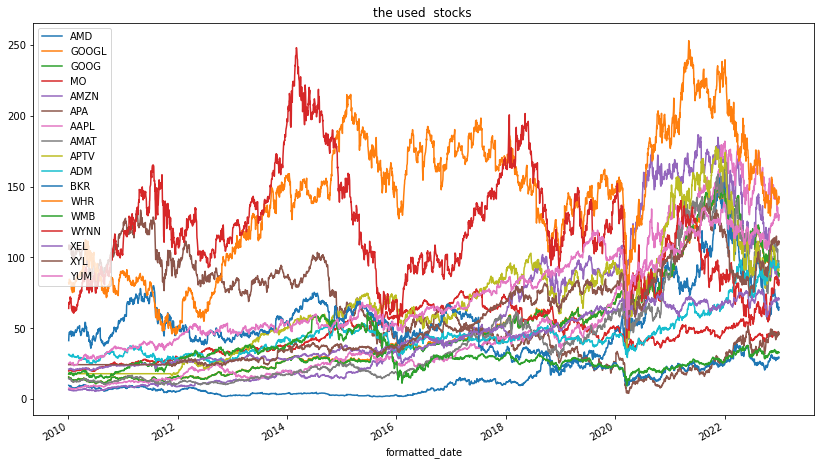

In [ ]:
df.plot(y=used_stock_list,figsize=(14,8))
plt.title("the used  stocks ")

# Find pairs of stocks that are cointegrated

**Identify two stocks that are highly correlated and likely to be cointegrated.**

**This can be done using statistical techniques such as the `Engle-Granger` test or the `Johansen` test.**
* For example, we  can  the `coint` function from the `statsmodels` library to perform the Engle-Granger test:


In [ ]:
# Find pairs of stocks that are cointegrated
pairs = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        result = coint(df[df.columns[i]], df[df.columns[j]])
        if result[1] < 0.05:  # p-value is less than 0.05, so the stocks are cointegrated
            pairs.append((df.columns[i], df.columns[j]))
            

In [ ]:
print(f"There are {len(pairs)} cointegrated pairs")

There are 6 cointegrated pairs


# Select one of the cointegrated pairs

In [ ]:
print(f"example_of_a_candidate_pair {pairs[0]}")

example_of_a_candidate_pair ('AMD', 'AMAT')


In [ ]:
# we select for exemple the first cointegrated pairs
stock_1_price = pairs[0][0]
stock_2_price = pairs[0][1]

In [ ]:
import statsmodels.tsa.stattools as ts

def test_for_cointegration(x, y):
    # Calculate the residuals of the regression
    resids = y - x

    # Perform the Augmented Dickey-Fuller test
    adf_test = ts.adfuller(resids)

    # Extract the p-value from the test result
    p_value = adf_test[1]

    # Test the null hypothesis that the residuals are non-stationary
    if p_value < 0.05:
        return True
    else:
        return False

#Using the Augmented Dickey-Fuller test to test for cointegration


In [ ]:
import pandas as pd
import statsmodels.tsa.stattools as ts
import yahoofinancials

def test_for_cointegration(x, y):
    # Calculate the residuals of the regression
    resids = y - x

    # Perform the Augmented Dickey-Fuller test
    adf_test = ts.adfuller(resids)

    # Extract the p-value from the test result
    p_value = adf_test[1]

    # Test the null hypothesis that the residuals are non-stationary
    if p_value < 0.05:
        return True
    else:
        return False

# Retrieve the stock data
yahoo_financials = yahoofinancials.YahooFinancials('AMD')
amd = yahoo_financials.get_historical_price_data('2010-01-01', '2023-01-01', 'daily')

yahoo_financials = yahoofinancials.YahooFinancials('AMAT')
amat = yahoo_financials.get_historical_price_data('2010-01-01', '2023-01-01', 'daily')

# Convert the data to a Pandas DataFrame
amd = pd.DataFrame(amd['AMD']['prices'])
amat = pd.DataFrame(amat['AMAT']['prices'])

# Test for cointegration
cointegrated = test_for_cointegration(amd['adjclose'], amat['adjclose'])

if cointegrated:
    print('Cointegration detected')
else:
    print('No cointegration detected')


Cointegration detected


#Using the Kwiatkowski-Phillips-Schmidt-Shin test to test for cointegration

In [ ]:
import pandas as pd
import statsmodels.tsa.stattools as ts
import yahoofinancials

# Retrieve the stock data
yahoo_financials = yahoofinancials.YahooFinancials('AMD')
amd = yahoo_financials.get_historical_price_data('2019-01-01', '2020-01-01', 'daily')

yahoo_financials = yahoofinancials.YahooFinancials('AMAT')
amat = yahoo_financials.get_historical_price_data('2019-01-01', '2020-01-01', 'daily')

# Convert the data to a Pandas DataFrame
amd = pd.DataFrame(amd['AMD']['prices'])
amat = pd.DataFrame(amat['AMAT']['prices'])

# Calculate the residuals of the regression
resids = amat['adjclose'] - amd['adjclose']

# Perform the Kwiatkowski-Phillips-Schmidt-Shin test
kpss_test = ts.kpss(resids)

# Extract the p-value from the test result
p_value = kpss_test[1]

# Test the null hypothesis that the residuals are stationary
if p_value < 0.05:
    print('Cointegration detected')
else:
    print('No cointegration detected')


Cointegration detected


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [ ]:
# Select one of the cointegrated pairs
X = df[[stock_1_price,stock_2_price]].values
# Calculate the spread between the two stocks.
y = df[stock_1_price] - df[stock_2_price]

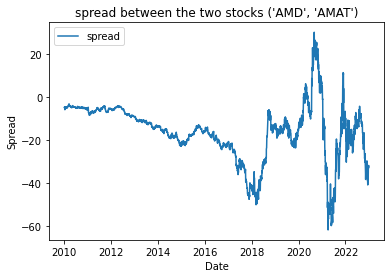

In [ ]:
plt.plot(y.index,y,label="spread")
plt.title(f"spread between the two stocks {(stock_1_price,stock_2_price)}")
plt.ylabel("Spread")
plt.xlabel("Date")
plt.legend()

#  Data Normalization
 
**What is Data Normalizatin?**
* Data normalization is the process of scaling the data so that it has a mean of zero and a standard deviation of one. This is often done to improve the performance of machine learning algorithms, as many algorithms assume that the data is normally distributed, or at least that the features have the same scale.

**As we observe in data, the stocks are not in the same scale, and that's will impact negativly the performance of ML model so  we need to bring them to the same scale for future analysis.**

* We will use `Min-Max Normalization`: This method scales the data between a minimum and maximum value, typically between 0 and 1.

* By normalizing the data, you can ensure that all of the features are on the same scale, which can help to improve the performance of many machine learning algorithms.


In [ ]:
# Normalize the data using min-max scaling
from sklearn.preprocessing import  MinMaxScaler
Min_max_sc_x = MinMaxScaler()
Min_max_sc_y = MinMaxScaler()
X_scaled = Min_max_sc_x.fit_transform(X)
y_scaled = Min_max_sc_y.fit_transform(y.values.reshape(-1,1))


#   Split the data into training and test sets

It is common practice in machine learning to split the available data into a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the performance of the model on unseen data.

There are a few reasons why this is done:

* **To prevent overfitting**: Overfitting occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By evaluating the model on the test set, you can get a better idea of how the model will perform on unseen data.

* **To get a more accurate estimate of model performance**: When you train a model on the entire dataset and evaluate it on the same data, it is difficult to get an accurate estimate of model performance. By evaluating the model on a separate test set, you can get a more accurate estimate of how the model will perform in the real world.

* **To compare multiple models**: Splitting the data into a training set and a test set allows you to compare the performance of different models on the same data. This can be useful when you are trying to choose the best model for your problem.

In [ ]:
y_scaled = y_scaled.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Training
**Why using ML models in paire trading?**

>The machine learning model is trained on historical data for the pairs of stocks and is used to make predictions about the future values of the `spread`. 
These predictions can then be used to determine when to buy or sell the pairs of stocks based on the entry and exit rules defined for the strategy.

>By using a machine learning model to predict the spread, the goal is to improve the performance of the trading strategy by making more accurate predictions and identifying profitable trading opportunities more efficiently.


**Why Training Three models?**
> We use three models (linear regression, random forest regressor, and multilayer perceptron) here to compare their performance based on the test data and the  mean squared error (MSE) metric. The model that gives the best performance will be used for the pairs trading strategy.

### LinearRegression
**Infos about LR**
> * Linear regression is a machine learning algorithm used for modeling the linear relationship between a dependent variable and one or more independent variables. It is one of the simplest and most widely used algorithms in data analysis and predictive modeling.
> * Linear regression works by fitting a linear equation to the data, where the dependent variable is predicted as a weighted sum of the independent variables, plus an intercept term. The weights and intercept are learned from the data and are used to make predictions about the dependent variable.
> * Linear regression is used in a wide range of applications, including predicting stock prices, demand for a product, or the likelihood of a customer churning. It is especially useful when the relationship between the dependent and independent variables is expected to be linear, or when the goal is to predict a continuous variable rather than a categorical one.

In [ ]:
# Create and train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

###  RandomForestRegressor

**Infos about RF**
>  Random forest is an ensemble machine learning algorithm that is used for both classification and regression tasks. It is a type of decision tree algorithm that creates a set of decision trees from a randomly selected subset of the training data, and then combines the predictions of these trees to make a final prediction.

> In the case of a random forest regressor, the goal is to predict a continuous variable rather than a categorical one. The algorithm works by training multiple decision trees on different subsets of the training data and then averaging the predictions of these trees to make a final prediction.

> Random forest is a powerful algorithm that is often used for feature selection and to improve the performance of other machine learning models. It is particularly useful when there is a large number of features in the data and when the relationship between the features and the target variable is complex and non-linear.

In [ ]:
# Create and train a random forest model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

### MLPRegressor
**Infos about MLP**
> Multilayer perceptron (MLP) is a type of artificial neural network that is used for both classification and regression tasks. It consists of multiple layers of interconnected nodes, where each node represents a unit of computation and the connections between the nodes represent the weights of the model.

> In the case of an MLP regressor, the goal is to predict a continuous variable rather than a categorical one. The algorithm works by training the model on a set of input-output pairs, where the input consists of the independent variables and the output is the dependent variable. The model learns the weights of the connections between the nodes by adjusting them based on the error between the predicted and actual values of the dependent variable.

> MLP is a powerful algorithm that is widely used for predictive modeling and can be applied to a wide range of applications, including stock price prediction and demand forecasting. It is particularly useful when the relationship between the input and output variables is complex and non-linear.

In [ ]:
# Create and train a MLPRegressor model
mlp_reg = MLPRegressor(hidden_layer_sizes=(500,),   activation='relu', solver="adam", learning_rate='adaptive',
                      learning_rate_init=0.001,        max_iter=1000,)
# fit it to the data
mlp_reg.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(500,), learning_rate='adaptive', max_iter=1000)

In [ ]:

# Make predictions and evaluate model performance
y_pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse)

# Make predictions and evaluate model performance
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse)

# Make predictions and evaluate model performance
y_pred_mlp = mlp_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mlp)
print("MLP MSE:", mse)

Linear Regression MSE: 4.922535729140948e-32
Random Forest MSE: 0.0002541190812054472
MLP MSE: 1.0913629493422053e-05


### MLPRegressor
**Infos about MLP**
> Multilayer perceptron (MLP) is a type of artificial neural network that is used for both classification and regression tasks. It consists of multiple layers of interconnected nodes, where each node represents a unit of computation and the connections between the nodes represent the weights of the model.

> In the case of an MLP regressor, the goal is to predict a continuous variable rather than a categorical one. The algorithm works by training the model on a set of input-output pairs, where the input consists of the independent variables and the output is the dependent variable. The model learns the weights of the connections between the nodes by adjusting them based on the error between the predicted and actual values of the dependent variable.

> MLP is a powerful algorithm that is widely used for predictive modeling and can be applied to a wide range of applications, including stock price prediction and demand forecasting. It is particularly useful when the relationship between the input and output variables is complex and non-linear.

## Show the predicted spread vs. the real spread 

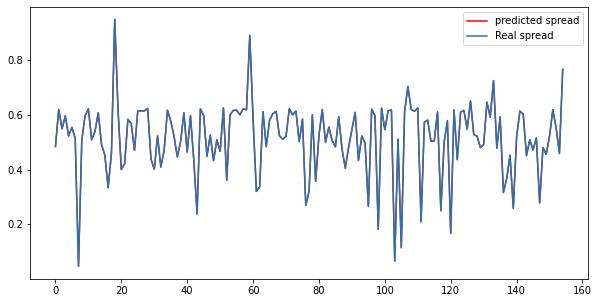

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_lr.reshape(-1)[:155],label="predicted spread",color="red")
plt.plot(y_test[:155],label="Real spread")
plt.legend()

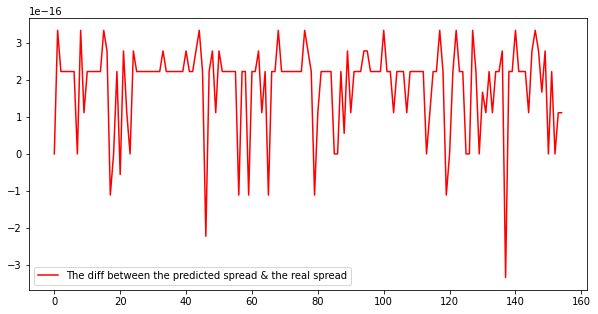

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_lr.reshape(-1)[:155]-y_test[:155],label="The diff between the predicted spread & the real spread",color="red")
plt.legend()

# Prediction & Model deploying

* We use the predictions from the machine learning model to construct a trading strategy.
* This could involve buying one stock in the pair when the predicted spread is below its mean and selling it when the predicted spread is above its mean, and doing the opposite for the other stock in the pair.

In [ ]:
# chose the model yu want
predictions  = y_pred_lr

<p>This code is creating a DataFrame called <code>df_test</code> to hold the stock prices and predicted spreads from the test set. It does this by assigning the first column of <code>X_test</code> (which contains the stock prices) to a column in the DataFrame with the name of the first stock, and the second column of <code>X_test</code> (which also contains stock prices) to a column in the DataFrame with the name of the second stock. It then adds a column called "spread" to the DataFrame with the values of <code>y_test</code>, which are the predicted spreads. The resulting DataFrame will have three columns: one for the price of the first stock, one for the price of the second stock, and one for the predicted spread between the two stocks.</p>


In [ ]:
df_test = pd.DataFrame()
df_test[stock_1_price] = X_test[:,0]
df_test[stock_2_price] = X_test[:,1]
df_test["spread"] = y_test

In [ ]:
df_test.head()

,AMD,AMAT,spread
0,0.584690,0.653198,0.483734
1,0.038680,0.016927,0.619410
2,0.014848,0.034044,0.548580
3,0.020525,0.012154,0.595909
4,0.013413,0.047980,0.522250


In [ ]:
# Calculate the mean of the spread
mean_spread = df_test["spread"].mean()

# Initialize a list to store the trades
trades = []

# Iterate through the predictions and construct trades
for i, prediction in enumerate(predictions):
  # If the predicted spread is below the mean, buy stock 1 and sell stock 2
  if prediction < mean_spread:
    trades.append(("BUY", stock_1_price, "SELL", stock_2_price))
  # If the predicted spread is above the mean, sell stock 1 and buy stock 2
  elif prediction > mean_spread:
    trades.append(("SELL", stock_1_price, "BUY", stock_2_price))

# Print the trades
print("Trading signals",trades[:2])

Trading signals [('BUY', 'AMD', 'SELL', 'AMAT'), ('SELL', 'AMD', 'BUY', 'AMAT')]


This code will create a list of trades, where each trade is represented as a tuple with the format
<code>(action, stock, action, stock)</code>. The <code>"action"</code> can be either <code>"BUY"</code> or <code>"SELL"</code>, and the <code>"stock"</code> is the name of the stock being bought or sold. The code will buy stock 1 and sell stock 2 if the predicted spread is below the mean, and will sell stock 1 and buy stock 2 if the predicted spread is above the mean.

Backtesting the trading strategy to see how it would have performed on the test data. This can be done by keeping track of the positions held and the profits or losses made at each time step, and then calculating the overall performance of the strategy.

In [ ]:
# Initialize variables to track the portfolio value and positions
portfolio_value = 100000
positions = {stock_1_price: 0, stock_1_price: 0}

# Iterate through the trades and update the portfolio value and positions
for trade in trades:
    action, stock, _, _ = trade
    if action == "BUY":
        positions[stock] += 1
        portfolio_value -= df_test[stock].iloc[i]
    elif action == "SELL":
        positions[stock] -= 1
        portfolio_value += df_test[stock ].iloc[i]

# Calculate the final value of the portfolio
final_value = portfolio_value
for stock, position in positions.items():
    final_value += position * df[stock].iloc[-1]

# Calculate the return of the portfolio
returns = (final_value - 100000) / 100000
print(f"Returns: {returns}")


Returns: -0.06476587910640227


<p>This code is backtesting the pairs trading strategy by simulating how it would have performed on the test data. It initializes variables to track the portfolio value and positions of the two stocks. The <code>portfolio_value</code> is initialized to 100,000 and the <code>positions</code> dictionary is initialized with both stocks having a position of 0.</p>

<p>The code then iterates through the <code>trades</code> list and updates the portfolio value and positions based on the actions specified in each trade. If the action is "BUY", it increments the position of the stock being bought and decrements the portfolio value by the price of the stock. If the action is "SELL", it decrements the position of the stock being sold and increments the portfolio value by the price of the stock.</p>

<p>After all the trades have been processed, the code calculates the final value of the portfolio by adding the positions of the two stocks to the portfolio value. It then calculates the returns of the portfolio by dividing the final value by the initial value. Finally, it prints the returns of the portfolio.</p>
